In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset = pd.read_excel("Obesity_Dataset.xlsx", nrows=400)
x = dataset.iloc[:, [4,6]].values
y = dataset.iloc[:, -1].values
print(dataset)

     Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0      2   18     155                        2                         2   
1      2   18     158                        2                         2   
2      2   18     159                        2                         2   
3      2   18     162                        2                         2   
4      2   18     165                        2                         1   
..   ...  ...     ...                      ...                       ...   
395    1   22     179                        2                         2   
396    1   23     171                        2                         2   
397    1   23     173                        2                         2   
398    1   23     173                        2                         1   
399    1   23     174                        2                         2   

     Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = classifier.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  1  0]
 [23  4  0]
 [ 2  4  0]]


/tmp/ipykernel_5813/46168890.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


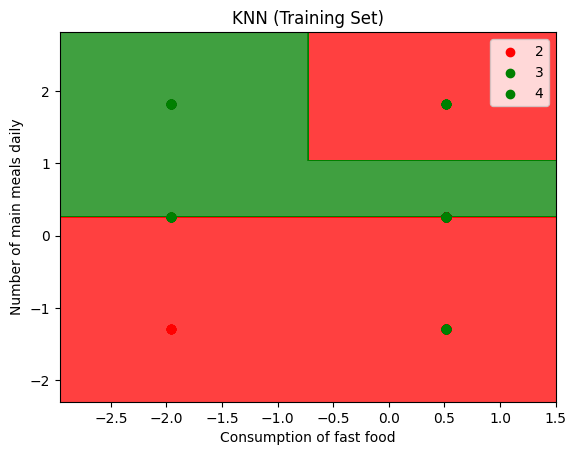

In [28]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("KNN (Training Set)")
plt.xlabel("Consumption of fast food")
plt.ylabel("Number of main meals daily")
plt.legend()
plt.show()

/tmp/ipykernel_5813/1374946503.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


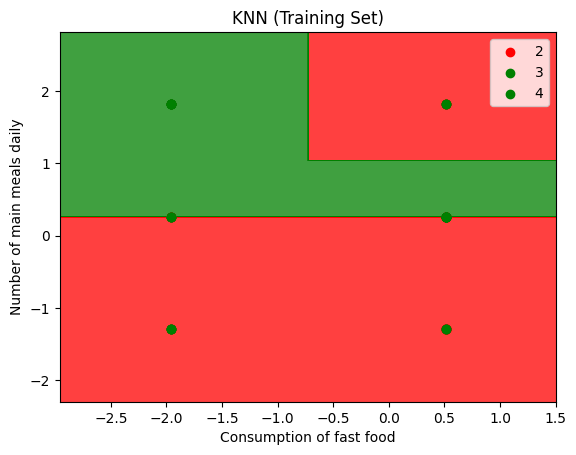

In [30]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("KNN (Training Set)")
plt.xlabel("Consumption of fast food")
plt.ylabel("Number of main meals daily")
plt.legend()
plt.show()